In [4]:
# Value object to be able to store value nodes for our network graph.
## needs functionallity for Value object mathematics
## needs proper tracking for the graphviz module

# 

In [2]:
class Value:
    def __init__(self, data:float, _op:str = '', _prev:tuple=()):
        self.data = data
        self._op = _op
        self._prev = _prev
        self.grad = 0.0 #initially has no effect on the function
    def __repr__(self):
        return f'Value({self.data})'
    def __add__(self, b):
        return Value(self.data + b.data, _op= '+', _prev=(self, b))
    def __mul__(self, b):
        return Value(self.data* b.data, _op= '*', _prev=(self, b))
    

In [3]:
a = Value(3)
b = Value(-4)
c = a * b

In [4]:
c.data

-12

In [5]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

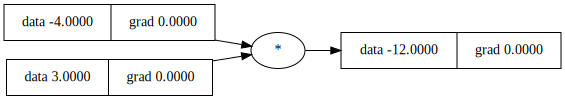

In [6]:
draw_dot(c)

In [7]:
a = Value(3.0)
h = 0.0001
b = Value(4+h)
c1 = a + b

a = Value(3)
b = Value(4)
c2 = a+b

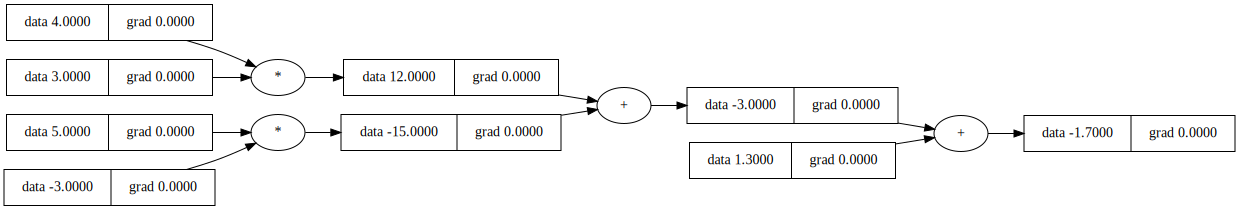

In [8]:
w1 = Value(3)
x1 = Value(4)
a1 = (w1*x1)
w2 = Value(-3)
x2 = Value(5)
a2 =  (w2*x2)
n = a1 + a2
b = Value(1.3)
o = n + b
# c.grad = 1.0
draw_dot(o)

Manual Backpropagation

In [9]:
o.grad = 1.0

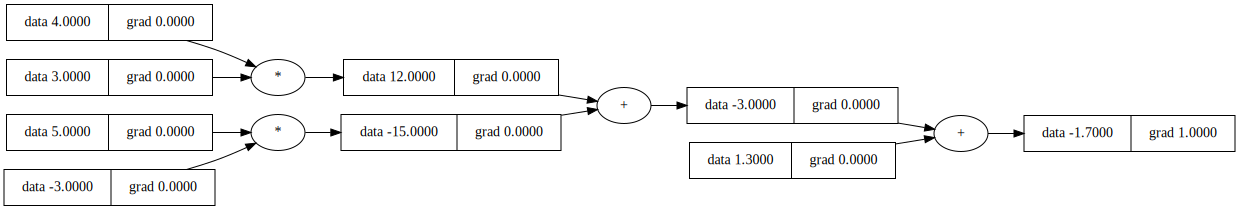

In [10]:
draw_dot(o)